In [1]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import dblquad
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Definir parámetros
N = 4026 # Número de vueltas
R_min = 0 # Radio de las bobinas (m)
R_max = 0.19
I = 2.5 * 10**(-3) # Corriente (A)
d = 0.20 # Separación de las bobinas (m)
mu_0 = 4 * np.pi * 1e-7

In [3]:
def B_x(x, y, z, a, b):
  k = mu_0 * N * I / (4* np.pi) # Constante
  # x, y, z: coordenadas del punto donde se quiere calcular el campo (m)
    # a, b: coordenadas del centro de la bobina (m)
  # Definir la función auxiliar para la integración
  def f(R,phi):
    return (z - R*np.sin(phi) )/ (((x - a)**2 + (y - b)**2 + (z - R * np.sin(phi))**2)**(3/2))
  # Integrar la función auxiliar entre 0 y Pi, y entre Rmin y Rmax
  integral, error = dblquad(f, R_min, R_max, 0, 2* np.pi)
  # Multiplicar la integral por la constante
  return  k * integral

In [4]:
def B_y(x, y, z, a, b):
  k = mu_0 * N * I / (4* np.pi) # Constante
  # x, y, z: coordenadas del punto donde se quiere calcular el campo (m)
    # a, b: coordenadas del centro de la bobina (m)
  # Definir la función auxiliar para la integración
  def f(R,phi):
    return (R*np.cos(phi)-z)/ (((x - a)**2 + (y - b)**2 + (z - R * np.sin(phi))**2)**(3/2))
  # Integrar la función auxiliar entre 0 y Pi, y entre Rmin y Rmax
  integral, error = dblquad(f, R_min, R_max, 0, 2* np.pi)
  # Multiplicar la integral por la constante
  return  k * integral

In [5]:
def B_z(x, y, z, a, b):
  k = mu_0 * N * I / (4* np.pi) # Constante
  # x, y, z: coordenadas del punto donde se quiere calcular el campo (m)
    # a, b: coordenadas del centro de la bobina (m)
  # Definir la función auxiliar para la integración
  def f(R,phi):
    return ((R)*(np.sin(phi)-np.cos(phi)) )/ (((x - a)**2 + (y - b)**2 + (z - R * np.sin(phi))**2)**(3/2))
  # Integrar la función auxiliar entre 0 y Pi, y entre Rmin y Rmax
  integral, error = dblquad(f, R_min, R_max, 0,  2*np.pi)
  # Multiplicar la integral por la constante
  return  k * integral

In [6]:
# Definir el rango de valores para x e y
x = np.linspace(-d/4, d/4, 20)
y = np.linspace(-d/4, d/4, 20)
# Crear una malla de puntos
X, Y = np.meshgrid(x, y)
# Inicializar una matriz vacía para el campo magnético
Bx= np.empty(shape=[X.shape[0], X.shape[1]], dtype=np.float64)
By= np.empty(shape=[X.shape[0], X.shape[1]], dtype=np.float64)
Bz= np.empty(shape=[X.shape[0], X.shape[1]], dtype=np.float64)
B= np.empty(shape=[X.shape[0], X.shape[1]], dtype=np.float64)

In [7]:
# Calcular el campo magnético en cada punto de la malla de x
for i in range(len(x)):
    for j in range(len(y)):
            # Sumar los campos de las 4 bobinas
           Bx[i, j] = B_x(x[i], y[j],0, d/2, 0) + B_x(x[i], y[j],0, -d/2, 0) + B_x(x[i], y[j], 0, 0, d/2) + B_x(x[i], y[j], 0, 0, -d/2)

In [8]:
# Calcular el campo magnético en cada punto de la malla de y
for i in range(len(x)):
    for j in range(len(y)):
            # Sumar los campos de las 4 bobinas
           By[i, j] = B_y(x[i], y[j],0, d/2, 0) + B_y(x[i], y[j],0, -d/2, 0) + B_y(x[i], y[j], 0, 0, d/2) + B_y(x[i], y[j], 0, 0, -d/2)

In [9]:
# Calcular el campo magnético en cada punto de la malla de z
for i in range(len(x)):
    for j in range(len(y)):
            # Sumar los campos de las 4 bobinas
           Bz[i, j] = B_z(x[i], y[j],0, d/2, 0) + B_z(x[i], y[j],0, -d/2, 0) + B_z(x[i], y[j], 0, 0, d/2) + B_z(x[i], y[j], 0, 0, -d/2)

In [10]:
# Calcular el campo magnético en cada punto de la malla
for i in range(len(x)):
    for j in range(len(y)):
           B[i, j] = np.sqrt((Bx[i, j])**2 + (By[i, j])**2 + (Bz[i, j])**2)

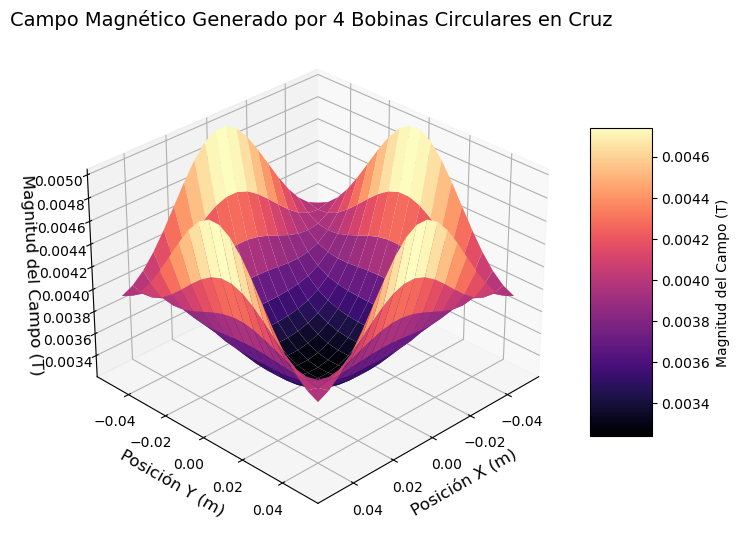

In [11]:
#Visualización del campo magnético 3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
# Ajustes de la superficie
surf = ax.plot_surface(X, Y, B, cmap='magma', linewidth=0, antialiased=True)
# Añadir barra de color con escala y unidades
norm = plt.Normalize(B.min(), B.max())
cbar = fig.colorbar(surf, shrink=0.5, aspect=5, norm=norm, label='Magnitud del Campo (T)')
cbar.ax.tick_params(labelsize=10)
# Etiquetas, título y leyenda
ax.set_xlabel('Posición X (m)', fontsize=12)
ax.set_ylabel('Posición Y (m)', fontsize=12)
ax.set_zlabel('Magnitud del Campo (T)', fontsize=12)
plt.title('Campo Magnético Generado por 4 Bobinas Circulares en Cruz', fontsize=14)
# Habilitar la interacción 3D y ajustar vista
ax.set_zlim(B.min(), B.max())
ax.view_init(30, 45)
# Mostrar la figura
plt.show()